In [196]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.pylab as pylab
#%matplotlib inline

from os import listdir
from os.path import isfile, join

import os
import imageio

In [2]:
plt = None

In [440]:
path = '/Users/tyler/Documents/programming/hr/from_log/to_csv.csv'
path = '/Users/tyler/Documents/programming/hr/from_log/all.csv'
path = '/Users/tyler/Documents/programming/hr/jun_6_data.csv'

In [441]:
df_raw = pd.read_csv(path)
df_raw.head()

,day,date,distance,time,hr,rate,pace
0,Tuesday,1/1/2019,10253,45,158.0,19,131.7
1,Tuesday,1/1/2019,10227,45,158.0,19,132.0
2,Wednesday,1/2/2019,10274,45,159.0,19,131.4
3,Thursday,1/3/2019,10274,45,159.0,19,131.4
4,Saturday,1/5/2019,10119,45,154.0,19,133.4


In [442]:
## only time = 45 min
df = df_raw[df_raw['time'] == 45]

## drop rows where hr = Nan
df = df.copy().dropna()

In [443]:
#df.head(30)

In [586]:
def str_to_date(string):
    x = datetime.strptime(string, '%m/%d/%Y')
    return datetime.date(x)

def date_to_str(this_dt):
    x = datetime.strftime(this_dt, '%m/%d/%Y')
    return x

def find_diff(dates):
    this_max = max(dates)
    return [(this_max - d).days for d in dates]

def alpha_list(dates_diff):
    alpha_min = .2
    alpha_max = 1
    
    max_diff = max(dates_diff)
    
    this_list = []
    
    for d in dates_diff:
        if d == 0:
            x = alpha_max
        else:
            x =  1 - d / 14
            if x < alpha_min:
                x =  alpha_min
        this_list.append(x)
    
    return np.asarray(this_list)

def gen_alpha(df):
    x = find_diff(df['datetime'])
    column = alpha_list(x)
    return column

def gen_alpha_new_new(df,num_to_highlight):
    df_len = len(df)
    column = np.ones(df_len) * .2
    if num_to_highlight > 0:
        column[-num_to_highlight:] = 1
    return column

def gen_alpha_new(df):
    df_len = len(df)
    column = np.ones(df_len) * .2
    column[-1:] = 1
    return column

In [461]:
df.head()

,day,date,distance,time,hr,rate,pace,datetime,date_sting
0,Tuesday,1/1/2019,10253,45,158.0,19,131.7,2019-01-01,01m/01d/2019
1,Tuesday,1/1/2019,10227,45,158.0,19,132.0,2019-01-01,01m/01d/2019
2,Wednesday,1/2/2019,10274,45,159.0,19,131.4,2019-01-02,01m/02d/2019
3,Thursday,1/3/2019,10274,45,159.0,19,131.4,2019-01-03,01m/03d/2019
4,Saturday,1/5/2019,10119,45,154.0,19,133.4,2019-01-05,01m/05d/2019


In [462]:
x = gen_alpha_new(df)
x

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 1. ])

In [463]:
x = pd.Series([str_to_date(d) for d in df['date']])
df['datetime'] = x.values

In [466]:
df['date_string'] = df['datetime'].apply(date_to_str)

In [467]:
df.head()

,day,date,distance,time,hr,rate,pace,datetime,date_sting,date_string
0,Tuesday,1/1/2019,10253,45,158.0,19,131.7,2019-01-01,01/01/2019,01/01/2019
1,Tuesday,1/1/2019,10227,45,158.0,19,132.0,2019-01-01,01/01/2019,01/01/2019
2,Wednesday,1/2/2019,10274,45,159.0,19,131.4,2019-01-02,01/02/2019,01/02/2019
3,Thursday,1/3/2019,10274,45,159.0,19,131.4,2019-01-03,01/03/2019,01/03/2019
4,Saturday,1/5/2019,10119,45,154.0,19,133.4,2019-01-05,01/05/2019,01/05/2019


In [48]:
x = find_diff(df['datetime'])
df['alpha'] = alpha_list(x)

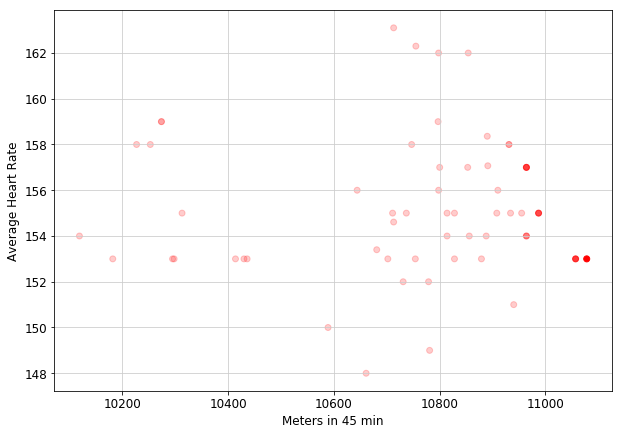

In [67]:
## customize plot
#fig = None


x = df['distance']
y = df['hr']

alphas = np.asarray(df['alpha'])
rgba_colors = np.zeros((data_len,4))
rgba_colors[:,0] = 1.0
rgba_colors[:, 3] = alphas


plt.scatter(x, y, color=rgba_colors)



data_len = len(df['hr'])

#plt.ylim([150,164])
plt.ylabel('Average Heart Rate')

#plt.xlim([10600,11100])
plt.xlabel('Meters in 45 min')

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.grid(True)

params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

pylab.rcParams.update(params)


#plt.scatter(x, y, color=rgba_colors)


fig = plt.gcf()
fig.set_size_inches(10, 7)

#fig.savefig('test2png.png', dpi=100)

In [450]:
df[:6]

,day,date,distance,time,hr,rate,pace
0,Tuesday,1/1/2019,10253,45,158.0,19,131.7
1,Tuesday,1/1/2019,10227,45,158.0,19,132.0
2,Wednesday,1/2/2019,10274,45,159.0,19,131.4
3,Thursday,1/3/2019,10274,45,159.0,19,131.4
4,Saturday,1/5/2019,10119,45,154.0,19,133.4
5,Sunday,1/6/2019,10182,45,153.0,19,132.6


In [61]:
#gen_alpha(this_df)

In [63]:
## in loop
i = 5
this_df = df[:i]
this_df['alpha'] = gen_alpha(this_df)

/Users/tyler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [449]:
df.head(16)

,day,date,distance,time,hr,rate,pace
0,Tuesday,1/1/2019,10253,45,158.0,19,131.7
1,Tuesday,1/1/2019,10227,45,158.0,19,132.0
2,Wednesday,1/2/2019,10274,45,159.0,19,131.4
3,Thursday,1/3/2019,10274,45,159.0,19,131.4
4,Saturday,1/5/2019,10119,45,154.0,19,133.4
5,Sunday,1/6/2019,10182,45,153.0,19,132.6
6,Monday,1/7/2019,10295,45,153.0,19,131.1
7,Tuesday,1/8/2019,10298,45,153.0,19,131.1
8,Wednesday,1/9/2019,10414,45,153.0,19,129.6
9,Thursday,1/10/2019,10313,45,155.0,19,130.9


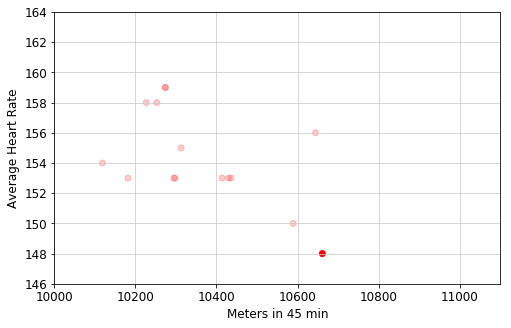

In [105]:
idx = 15
this_plot = make_plot(df,idx)

In [140]:
def make_plot(df,idx):
    plt.ioff()
    this_fig = None
    df_trunc = df[:idx]

    x = df_trunc['distance']
    y = df_trunc['hr']
    
    data_len = len(df_trunc['hr'])
    
    alphas = gen_alpha_new(df_trunc)
    
    #alphas = np.asarray(df_trunc['alpha'])
    rgba_colors = np.zeros((data_len,4))
    rgba_colors[:,0] = 1.0
    rgba_colors[:, 3] = alphas

    plt.scatter(x, y, color=rgba_colors)

    plt.ylim([146,164])
    plt.ylabel('Average Heart Rate')

    plt.xlim([10000,11100])
    plt.xlabel('Meters in 45 min')

    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)

    params = {'legend.fontsize': 'large',
              'figure.figsize': (15, 5),
             'axes.labelsize': 'large',
             'axes.titlesize':'large',
             'xtick.labelsize':'large',
             'ytick.labelsize':'large'}

    pylab.rcParams.update(params)

    this_fig = plt.gcf()
    this_fig.set_size_inches(8, 5)
    return this_fig

In [150]:
data_len = len(df)
#data_len = 10

for idx in range(1, data_len + 1):
    fig = make_plot(df,idx)
    fig.savefig(f'for_gif/{idx:03d}.png', dpi=100)
    plt.close(fig)

In [108]:
data_len

54

In [153]:
def files_from_dir(a_dir):
    onlyfiles = [f for f in listdir(a_dir) if isfile(join(a_dir, f))]
    return onlyfiles

In [167]:
file_list = files_from_dir('for_gif')
file_list.sort()

In [173]:
images = []
for file in file_list:
    path = os.path.join('for_gif',file)
    images.append(imageio.imread(path))

imageio.mimsave('gif/demo.gif', images)

In [174]:
## Add watts

In [470]:
df['split'] = 45*60/(df['distance']/500)
df['watts'] = 2.8 / (df['split']/500)**3

In [471]:
df['date'][0]

'1/1/2019'

In [484]:
x = ['a','b','c']

In [485]:
x[-1:]

['c']

In [505]:
x = df['date_string'].iloc[-1]

In [506]:
print(x)

06/06/2019


In [537]:
def make_plot_watts(df,idx):
    plt.ioff()
    
    # data for plot
    df_trunc = df[:idx]
    date_string = df_trunc['date_string'].iloc[-1]

    x = df_trunc['watts']
    y = df_trunc['hr']
    
    data_len = len(df_trunc['hr'])
    
    alphas = gen_alpha_new(df_trunc)
    
    rgba_colors = np.zeros((data_len,4))
    rgba_colors[:,0] = 1.0
    rgba_colors[:, 3] = alphas
    
    # plot
    #fig = plt.figure()
    fig, ax1 = plt.subplots()
    ax1.scatter(x, y, color=rgba_colors)

    ax1.set_ylim([146,164])
    ax1.set_ylabel('Average Heart Rate')

    ax1.set_xlim([145,200])
    ax1.set_xlabel('Average Watts in 45 min')
    
    ax2 = ax1.twiny()
    ax2.set_xlabel('Meters in 45 min')
    ax2.set_xlim(145, 200)
    ax2.set_xticks(w)
    ax2.set_xticklabels(d_list)
    ax2.grid(True)
    
    ax1.set_title('Heart rate and power over time (rowing)')
    ax1.yaxis.grid(which='major')


    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)

    params = {'axes.titlesize': 'xx-large',
             'legend.fontsize': 'large',
             'figure.figsize': (15, 5),
             'axes.labelsize': 'large',
             'xtick.labelsize':'large',
             'ytick.labelsize':'large'}

    pylab.rcParams.update(params)
    
    
    textstr = date_string
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)

    # place a text box in upper left in axes coords
    ax1.text(-0.1, 1.1, textstr, transform=ax1.transAxes, fontsize=11,
            verticalalignment='top', bbox=props)
    
    plt.subplots_adjust(top=0.85)     # Add space at top
    this_fig = plt.gcf()
    ax = plt.gca()
    ax.grid(True)
    this_fig.set_size_inches(8, 5)
    return this_fig

In [616]:
def make_plot_watts_by_date(df,idx,num_to_highlight, date_string):
    plt.ioff()
    
    # data for plot
    df_trunc = df[:idx]
    #date_string = df_trunc['date_string'].iloc[-1]

    x = df_trunc['watts']
    y = df_trunc['hr']
    
    data_len = len(df_trunc['hr'])
    
    alphas = gen_alpha_new_new(df_trunc,num_to_highlight)
    
    rgba_colors = np.zeros((data_len,4))
    rgba_colors[:,0] = 1.0
    rgba_colors[:, 3] = alphas
    
    # plot
    #fig = plt.figure()
    fig, ax1 = plt.subplots()
    ax1.scatter(x, y, color=rgba_colors)

    ax1.set_ylim([146,164])
    ax1.set_ylabel('Average Heart Rate')

    ax1.set_xlim([145,200])
    ax1.set_xlabel('Average Watts in 45 min')
    
    ax2 = ax1.twiny()
    ax2.set_xlabel('Meters in 45 min')
    ax2.set_xlim(145, 200)
    ax2.set_xticks(w)
    ax2.set_xticklabels(d_list)
    ax2.grid(True)
    
    ax1.set_title('Heart rate and power over time (rowing)')
    ax1.yaxis.grid(which='major')


    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)

    params = {'axes.titlesize': 'xx-large',
             'legend.fontsize': 'large',
             'figure.figsize': (15, 5),
             'axes.labelsize': 'large',
             'xtick.labelsize':'large',
             'ytick.labelsize':'large'}

    pylab.rcParams.update(params)
    
    
    textstr = date_string
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)

    # place a text box in upper left in axes coords
    ax1.text(-0.1, 1.1, textstr, transform=ax1.transAxes, fontsize=11,
            verticalalignment='top', bbox=props)
    
    plt.subplots_adjust(top=0.85)     # Add space at top
    this_fig = plt.gcf()
    ax = plt.gca()
    ax.grid(True)
    this_fig.set_size_inches(8, 5)
    return this_fig

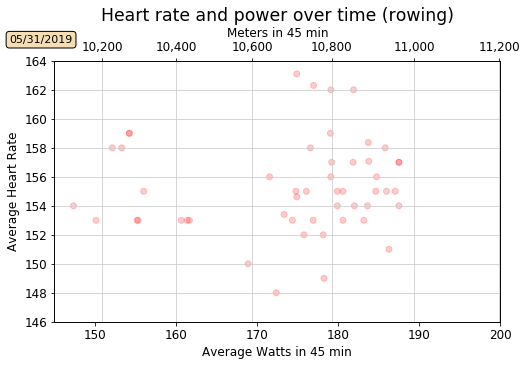

In [587]:
idx = 51

plt.close(fig)
make_plot_watts_by_date(df,idx,0)
plt.close(fig)

In [602]:
df.head()

,day,date,distance,time,hr,rate,pace,datetime,date_sting,date_string,split,watts
0,Tuesday,1/1/2019,10253,45,158.0,19,131.7,2019-01-01,01/01/2019,01/01/2019,131.668780,153.327343
1,Tuesday,1/1/2019,10227,45,158.0,19,132.0,2019-01-01,01/01/2019,01/01/2019,132.003520,152.163857
2,Wednesday,1/2/2019,10274,45,159.0,19,131.4,2019-01-02,01/02/2019,01/02/2019,131.399650,154.271401
3,Thursday,1/3/2019,10274,45,159.0,19,131.4,2019-01-03,01/03/2019,01/03/2019,131.399650,154.271401
4,Saturday,1/5/2019,10119,45,154.0,19,133.4,2019-01-05,01/05/2019,01/05/2019,133.412393,147.393906


In [617]:
start_date = df['datetime'].iloc[0]

idx = 1

fig_count = 1

for days in range(156):
    this_date = start_date + timedelta(days=days)    
    this_num = sum(df['datetime']==this_date)
    date_string = date_to_str(this_date)
    fig = make_plot_watts_by_date(df,idx,this_num,date_string)
      
    fig.savefig(f'for_gif/by_date/{fig_count:03d}.png', dpi=100)
    plt.close(fig)
    
    fig_count += 1
    
    idx += this_num  
    
    

In [613]:
this_date = start_date + timedelta(days=156) 
this_date

datetime.date(2019, 6, 6)

In [539]:
data_len = len(df)
#data_len = 10

for idx in range(1, data_len + 1):
    fig = make_plot_watts(df,idx)
    fig.savefig(f'for_gif/watts2/{idx:03d}.png', dpi=100)
    plt.close(fig)
    
extra = 10

for idx in range(data_len + 1,data_len + 1 + extra):
    fig = make_plot_watts(df,data_len)
    fig.savefig(f'for_gif/watts2/{idx:03d}.png', dpi=100)
    plt.close(fig)

In [618]:
file_list = files_from_dir('for_gif/by_date')
file_list.sort()

images = []
for file in file_list:
    path = os.path.join('for_gif/by_date',file)
    images.append(imageio.imread(path))

imageio.mimsave('gif/by_date.gif', images)

In [222]:
w = np.linspace(145,200)
w = np.linspace(1,500)

In [223]:
w

array([  1.        ,  11.18367347,  21.36734694,  31.55102041,
        41.73469388,  51.91836735,  62.10204082,  72.28571429,
        82.46938776,  92.65306122, 102.83673469, 113.02040816,
       123.20408163, 133.3877551 , 143.57142857, 153.75510204,
       163.93877551, 174.12244898, 184.30612245, 194.48979592,
       204.67346939, 214.85714286, 225.04081633, 235.2244898 ,
       245.40816327, 255.59183673, 265.7755102 , 275.95918367,
       286.14285714, 296.32653061, 306.51020408, 316.69387755,
       326.87755102, 337.06122449, 347.24489796, 357.42857143,
       367.6122449 , 377.79591837, 387.97959184, 398.16326531,
       408.34693878, 418.53061224, 428.71428571, 438.89795918,
       449.08163265, 459.26530612, 469.44897959, 479.63265306,
       489.81632653, 500.        ])

In [224]:
s = (2.8/w)**(1/3)*500

In [225]:
s 

array([704.72987321, 315.13346301, 253.96418841, 223.02397134,
       203.16876345, 188.90741526, 177.95931443, 169.17591049,
       161.90431542, 155.74092765, 150.42034786, 145.75956303,
       141.62751971, 137.92744573, 134.58603774, 131.5465622 ,
       128.76429444, 126.20341084, 123.83481529, 121.63458412,
       119.58283109, 117.66286422, 115.86054932, 114.16382287,
       112.56231415, 111.04704896, 109.61021458, 108.24497163,
       106.94530212, 105.70588566, 104.52199786, 103.38942634,
       102.30440085, 101.26353484, 100.26377613,  99.30236527,
        98.37680001,  97.48480507,  96.62430597,  95.7934067 ,
        94.99037016,  94.21360136,  93.46163258,  92.73311056,
        92.0267851 ,  91.34149912,  90.67617981,  90.02983084,
        89.40152544,  88.79040017])

In [226]:
#s * 500
d = 45 * 60 * 500 / s

In [259]:
d_list = ['10,200','10,400','10,600','10,800','11,000','11,200']
d = np.array([10200,10400,10600,10800,11000,11200])
s = 45 * 60 * 500 / d
w = 2.8/((s/500)**3)
w

array([150.96186557, 160.01723315, 169.42766855, 179.2       ,
       189.34105573, 199.85766397])

In [248]:
#plt.plot(w,d)

In [ ]:
def make_plot_watts(df,idx):
    plt.ioff()
    
    # data for plot
    df_trunc = df[:idx]

    x = df_trunc['watts']
    y = df_trunc['hr']
    
    data_len = len(df_trunc['hr'])
    
    alphas = gen_alpha_new(df_trunc)
    
    rgba_colors = np.zeros((data_len,4))
    rgba_colors[:,0] = 1.0
    rgba_colors[:, 3] = alphas
    
    # plot
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(x, y, color=rgba_colors)

    ax1.ylim([146,164])
    ax1.ylabel('Average Heart Rate')

    ax1.xlim([145,200])
    ax1.xlabel('Average Watts in 45 min')
    
    ax2 = ax1.twiny()
    ax2.set_xlabel('Meters in 45 min')
    ax2.set_xlim(145, 200)
    ax2.set_xticks(w)
    ax2.set_xticklabels(d_list)

    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)

    params = {'legend.fontsize': 'large',
              'figure.figsize': (15, 5),
             'axes.labelsize': 'large',
             'axes.titlesize':'large',
             'xtick.labelsize':'large',
             'ytick.labelsize':'large'}

    pylab.rcParams.update(params)

    this_fig = plt.gcf()
    this_fig.set_size_inches(8, 5)
    return this_fig